

---


# **<a id="Content" style="color:##fadc75;">Table of Contents</a>**

[1. Data Preparation](#scrollTo=-eKv35iERkSX&line=1&uniqifier=1)

>[Column Descriptions](#scrollTo=K58YYMr3R42s&line=8&uniqifier=1)

[2. Data Cleaning](#scrollTo=WzUCY_9gRs_p&line=1&uniqifier=1)

>[Investigating and Treating Null Values](#scrollTo=oUM21Zhr-CAK&line=1&uniqifier=1)

>[Data Aggregations](#scrollTo=R5DMY84Z9j8m&line=1&uniqifier=1)

[3. Data Exploration](#scrollTo=d1AgkqpH1L2o&line=1&uniqifier=1)

>[Treating Outliers](#scrollTo=DvyyAo5P2wBO&line=3&uniqifier=1)

[4. Data Visualization](#scrollTo=4SqxyNdW66wD&line=3&uniqifier=1)

[5. Conclusion](#scrollTo=1LbN3abbbd0v&line=3&uniqifier=1)

[6. References](#scrollTo=spiUV2GKY2Kz&line=9&uniqifier=1)

# Data Preparation

In [63]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Importing and reading the data

url = 'https://raw.githubusercontent.com/soltaniehha/Intro-to-Data-Analytics/main/data/AnalyticsEdge-Datasets/Framingham.csv'
heart = pd.read_csv(url)

In [65]:
# Looking at the first couple of rows of the data

heart.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [66]:
# Checking columns data types

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [67]:
# Checking descriptive statistics

heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


From an initial examination, we observe high mean values for age (49 years), totChol (237 mg/dL), diaBP (83 mmHg), and sysBP (132 mmHg). It seems that the average participant in our data is old and has high cholesterol levels and high blood pressure.

## Column Descriptions

| **Column**     | **Description** |
| ----------- | ----------- |
| male | Sex of the participants (0 = Female, 1 = Male) |
| age | Age at the time of medical examination in years |
| education | Categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4) |
| currentSmoker | Current cigarette smoking at the time of examinations (0 = Not current smoker, 1 = Current smoker ) |
| cigsPerDay | Number of cigarettes smoked each day (0 = Not current, smoker 1-90 cigarettes per day) |
| BPmeds | Use of Anti-hypertensive medication at exam (0 = Not currently used, 1 = Current Use) |
| prevalentStroke | Prevalent Stroke (0 = Free of disease, 1 = Prevalent disease ) |
| prevalentHyp | Prevalent Hypertensive. Subject was defined as hypertensive if treated or if second exam at which mean systolic was >=140 mmHg or mean Diastolic >=90 mmHg |
| diabetes | Diabetic according to criteria of first exam treated (0 = Not a diabetic, 1 = Diabetic ) |
| totChol | Total cholesterol (mg/dL) |
| sysBP | Systolic Blood Pressure (mmHg) |
| diaBP | Diastolic blood pressure (mmHg) |
| BMI | Body Mass Index, weight (kg)/height (m)^2 |
| heartRate | Heart rate (beats/minute) |
| glucose | Blood glucose level (mg/dL) |
| TenYearCHD  | The 10 year risk of coronary heart disease(CHD) |

# Data Cleaning

In [68]:
# Creating categorical column for sex

heart['sex'] = np.where(heart.male == 1, 'Male', 'Female')
heart.drop('male', axis = 1, inplace = True)

### Investigating and Treating Null Values

In [69]:
# Checking null values by column

heart.isnull().sum()

age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
sex                  0
dtype: int64

In [70]:
# Percentage of Null values

heart.isnull().sum() / len(heart) * 100

age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
sex                0.000000
dtype: float64

Since all the participants with missing cigsPerDay values are current smokers, we can assign imputed values by taking the median cigsPerDay of the smokers.

In [71]:
# Computing mean and median and finding unique values

print('Mean of cigsPerDay = {} and median = {}'.format(round(heart[heart.currentSmoker == 1]['cigsPerDay'].mean(), 2), heart[heart.currentSmoker == 1]['cigsPerDay'].median()))
print('Unique values = {}'.format(heart[heart.cigsPerDay.isna()]['currentSmoker'].unique()))

Mean of cigsPerDay = 18.36 and median = 20.0
Unique values = [1]


In [72]:
# Dealing with missing values

median_cigs = heart[heart.currentSmoker == 1]['cigsPerDay'].median()

heart.cigsPerDay.fillna(median_cigs, inplace = True)

In our data, even if a participant has prevalent hypertension, systolic blood pressure >= 140, and diastolic blood pressure >= 90, they are not necessarily prescribed blood pressure medication during the time of examination.

All participants that were prescribed blood pressure medication were also not diagnosed with prevanlent hypertension or had blood pressure higher than the aforementioned thresholds.

Hence, we cannot conclusively ascertain the missing values for BPMeds, and so we will fill them using probabilistic imputation.

In [73]:
# Percentage of participants prescribed blood pressure medication

heart.BPMeds.value_counts() / len(heart.BPMeds) * 100

0.0    95.825472
1.0     2.924528
Name: BPMeds, dtype: float64

In [74]:
# Filling null values with probabilistic imputation

prob_dist = heart['BPMeds'].value_counts(normalize=True)

heart['BPMeds'].fillna(np.random.choice(prob_dist.index, p=prob_dist.values), inplace=True)

Although the mean and median values for the glucose and total cholesterol columns are very similar, we will choose to impute the missing values for these columns with the median as it is less affected by outliers.

In [75]:
# Computing mean and median of the columns

print('Mean of glucose = {} and median = {}'.format(round(heart.glucose.mean(), 2), heart.glucose.median()))

print('Mean of totChol = {} and median = {}'.format(round(heart.totChol.mean(), 2), heart.totChol.median()))

Mean of glucose = 81.96 and median = 78.0
Mean of totChol = 236.7 and median = 234.0


In [76]:
# Filling missing values with median

heart.glucose.fillna(heart.glucose.median(), inplace = True)

heart.totChol.fillna(heart.totChol.median(), inplace = True)

We can impute the participant with the missing heart rate with the median heart rate.

In [77]:
# Computing mean and median of heartRate

print('Mean of heart rate = {} and median = {}'.format(round(heart.heartRate.mean(), 2), heart.heartRate.median()))

Mean of heart rate = 75.88 and median = 75.0


In [78]:
# Filling missing values with median

heart.heartRate.fillna(heart.heartRate.median(), inplace = True)

In [79]:
# Computing mean and median of BMI

print('Mean of BMI = {} and median = {}'.format(round(heart.BMI.mean(), 2), heart.BMI.median()))

Mean of BMI = 25.8 and median = 25.4


In [80]:
# Filling missing values with median

heart.BMI.fillna(heart.BMI.median(), inplace = True)

### Data Aggregations

For easier analysis, we can group participants by age and BMI by aggregating them into bins/buckets. For age, we will use the following categories:

| **Criteria**     | **Age Group** |
| ------------ | --------------- |
| Age <= 40 | Adult |
| 40 < Age <= 55 |  Middle Aged |
| Age > 55 | Senior  |

For BMI, we will use the following categories published by the [CDC (2022)](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html):

| **Criteria**     | **BMI Group** |
| ----------- | ----------- |
| Below 18.5 | Underweight  |
| 18.5 – 24.9 | Healthy  |
| 25.0 – 29.9 | Overweight  |
| 30.0 and Above | Obese  |



In [81]:
# Making new columns by grouping all participants by age and BMI

heart['age_group'] = np.where(heart.age <= 40, 'Adult', np.where(heart.age > 55, 'Senior', 'Middle Aged'))

heart['BMI_group'] = np.where(heart.BMI < 18.5, 'Underweight', np.where((heart.BMI >= 18.5) & (heart.BMI <= 24.9), 'Healthy', np.where(heart.BMI >= 30, 'Obese', 'Overweight')))

# Data Exploration

First, we can look at the distribution of our data for the numerical columns (except age and cigsPerDay). This will provide us with information on outliers or skewness in the data.

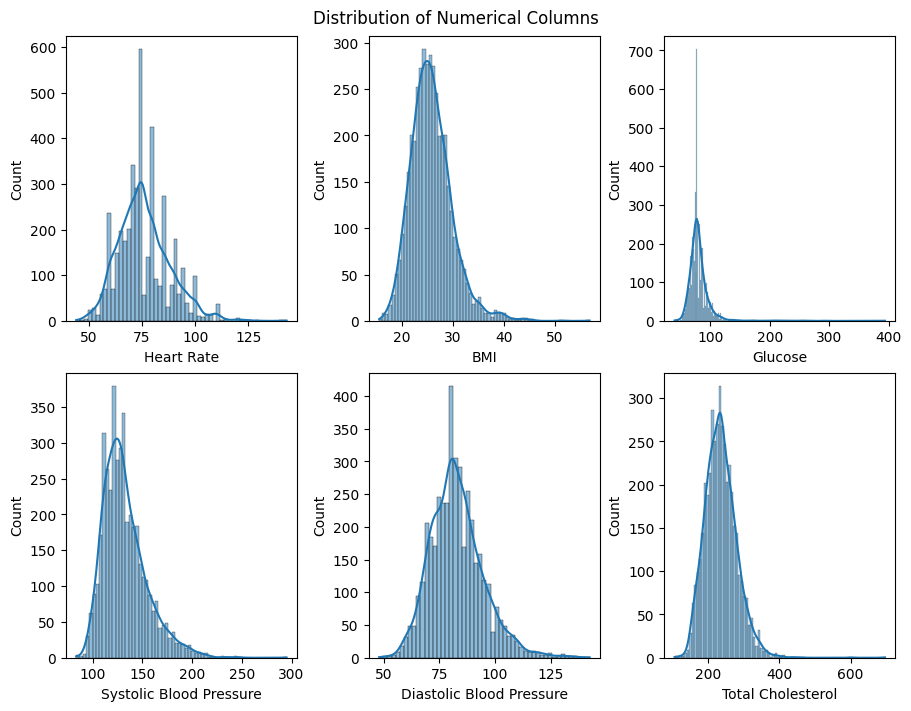

In [82]:
# Plotting the distribution (histogram) of the numerical columns

fig, axs = plt.subplots(2, 3, figsize = (9,7), layout = 'constrained')

sns.histplot(heart.heartRate, kde = True, ax = axs[0, 0])
axs[0, 0].set_xlabel('Heart Rate')
sns.histplot(heart.BMI, kde = True, ax = axs[0, 1])
sns.histplot(heart.glucose, kde = True, ax = axs[0, 2])
axs[0, 2].set_xlabel('Glucose')
sns.histplot(heart.sysBP, kde = True, ax = axs[1, 0])
axs[1, 0].set_xlabel('Systolic Blood Pressure')
sns.histplot(heart.diaBP, kde = True, ax = axs[1, 1])
axs[1, 1].set_xlabel('Diastolic Blood Pressure')
sns.histplot(heart.totChol, kde = True, ax = axs[1, 2])
axs[1, 2].set_xlabel('Total Cholesterol')
fig.suptitle('Distribution of Numerical Columns')
plt.show();

From the above visualization, we can note that except Diastolic Blood Pressure and Heart Rate, all other columns have a right skew. This means that there are outliers affecting the distribution of these columns and we have to be cognizant of this fact in our analysis.

### Treating Outliers

The [American Heart Association (2023)](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings) defines a systolic blood pressure of 180 or higher as a hypertensive crisis, which requires medical attention. The participant below has a systolic blood pressure of 295, and she was not prescribed blood pressure medication at the time of examination. This does not seem plausible given her age of 64 years, and so we can drop this participant from our data.

In [83]:
heart[heart.sysBP > 250]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex,age_group,BMI_group
481,64,1.0,0,0.0,0.0,0,1,0,253.0,295.0,135.0,38.82,92.0,70.0,1,Female,Senior,Obese


In [84]:
# Dropping the outliers

heart = heart[heart.sysBP < 250]

According to the [Cleveland Clinic (2018)](https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean), a total cholesterol level of 240 and higher is considered dangerous. So the two participants below with cholesterol levels of 600 mg/dL and 696 mg/dL can be dropped as it is likely a case of equipment failure or data entry error. Their BMI levels are close to the average (25) of the participants in the study and the woman participant is not even a smoker (which is a risk factor for high cholesterol). Hence, we can drop them from our data.

In [85]:
heart[heart.totChol > 500]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex,age_group,BMI_group
1111,52,2.0,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1,Female,Middle Aged,Overweight
3160,51,NaN,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0,Male,Middle Aged,Healthy


In [86]:
# Dropping the outliers

heart = heart[heart.totChol < 500]

Next, we can plot the heatmap of the correlations for all the numeric columns to check for collinearity and/or spurious relationships between variables.

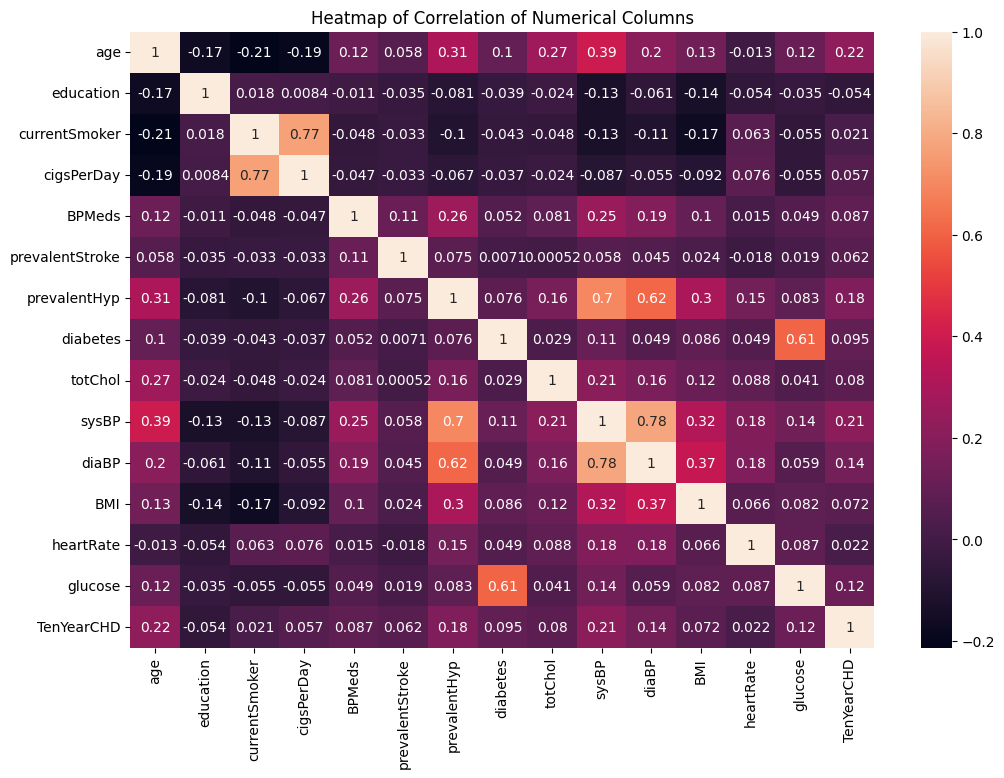

In [87]:
# Plotting heatmap of correlation between all the numeric variables

plt.figure(figsize = (12, 8))
sns.heatmap(heart.corr(numeric_only = True), annot = True)
plt.title('Heatmap of Correlation of Numerical Columns')
plt.show();

From the above visualization, we can observe that sysBP and diaBP are highly correlated with prevalentHyp (0.7 and 0.62 respectively). This follows the fact that participants with high blood pressure have likely been diagnosed with hypertension. The two blood pressures also have a correlation of 0.78 as having a high systolic blood pressure likely means that one's diastolic blood pressure is also high (and vice versa).

Glucose is highly correlated with diabetes (0.61) since participants with higher glucose levels are more likely to be diagnosed with diabetes. We also see 0.77 correlation between cigsPerDay and currentSmoker as non-smokers would not smoke every day.

For the purposes of our EDA analysis, we will not drop any of the above columns. But if the goal was to build a machine learning model, we could potentially drop some of the correlated variables after further investigation.

# Data Visualization

Now, we move on to visualizing trends or patterns within our data. First, we will investigate education status as the variable has very weak correlations with the other columns.

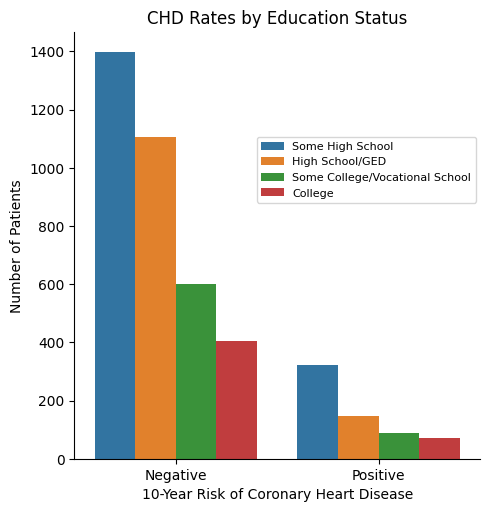

In [88]:
# Plotting CHD by education levels

sns.catplot(data = heart, x = 'TenYearCHD', hue = 'education', kind = 'count', legend = False);
plt.xlabel('10-Year Risk of Coronary Heart Disease')
plt.ylabel('Number of Patients')
plt.title('CHD Rates by Education Status')
plt.xticks(ticks = [0, 1], labels = ['Negative', 'Positive'])
plt.legend(loc = [0.45, 0.6], labels = ['Some High School', 'High School/GED', 'Some College/Vocational School', 'College'], fontsize = 8)
plt.show()

From the above visualization, we can conclude that education levels do not determine coronary heart disease outcomes for the participants in our study. The rates for prevalent disease for all groups are in the 12%-18% range, with 'Some High School' being the highest and 'High School/GED' being the lowest. Therefore, there does not seem to be a pattern in the data pertaining education levels. This makes sense as education should not have any effect on heart disease risk, which according to the [CDC (2020)](https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm), is largely due to genetic factors and lifestyle factors such as high blood pressure, diabetes, and obesity among others.

Moving forward, we will drop the column from our data for easier analysis.

In [89]:
# Dropping the education column

heart.drop('education', axis = 1, inplace = True)

Next, we will check the rates of coronary heart disease for participants by different categories in our data.

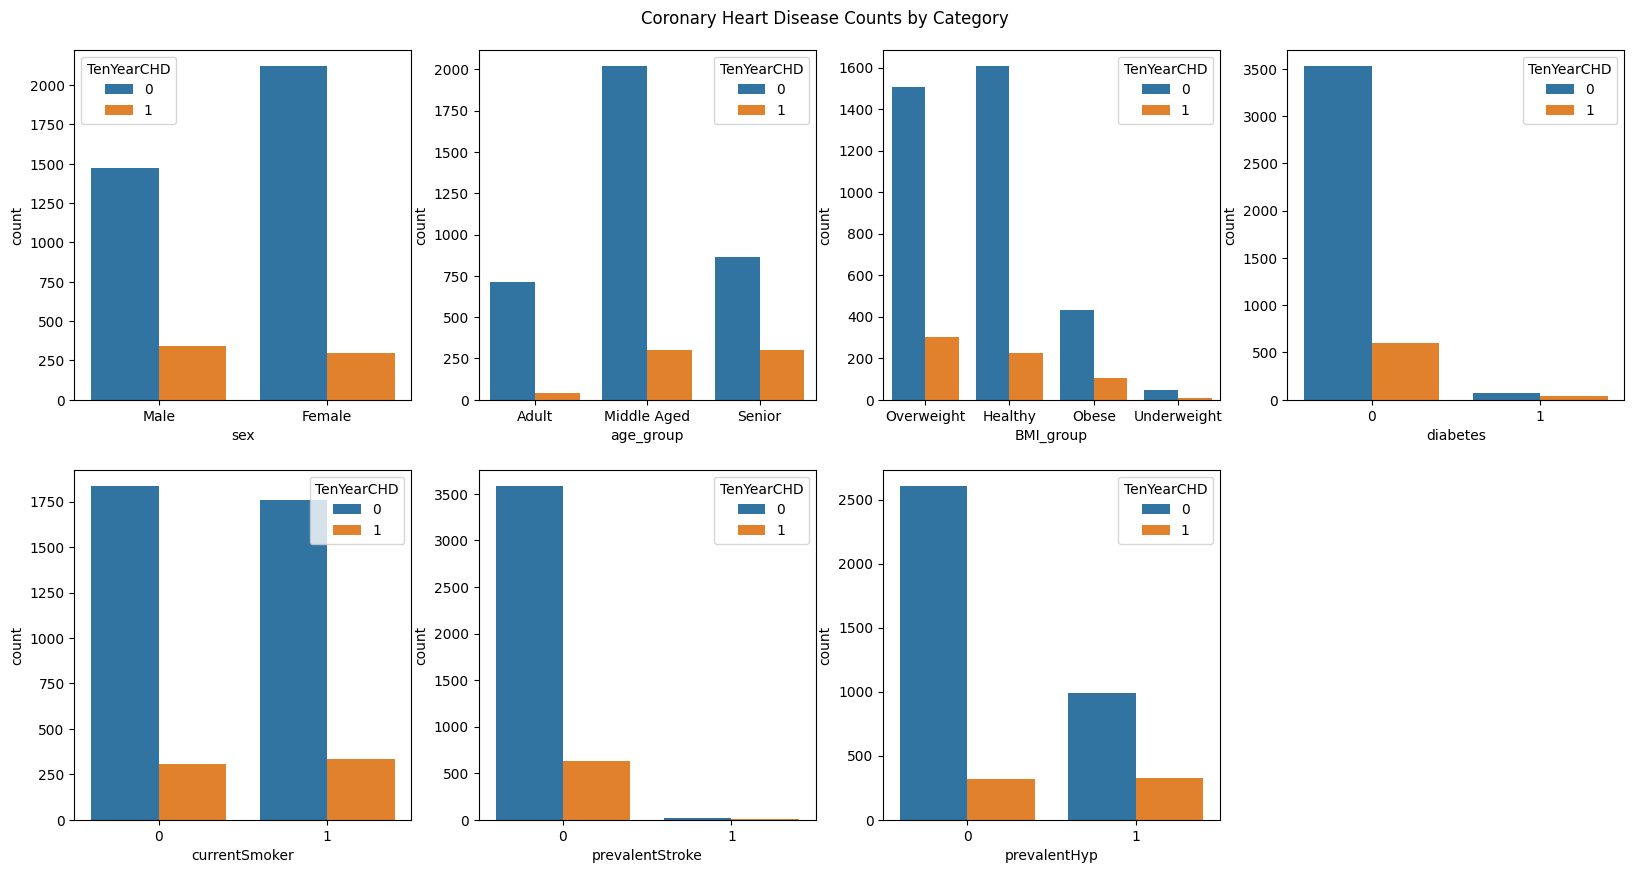

In [90]:
# Plotting TenYearCHD rates by group

fig, axs = plt.subplots(2, 4, figsize = (20, 10))

sns.countplot(heart, x = 'sex', hue = 'TenYearCHD', ax = axs[0, 0])
sns.countplot(heart, x = 'age_group', hue = 'TenYearCHD', ax = axs[0, 1])
sns.countplot(heart, x = 'BMI_group', hue = 'TenYearCHD', ax = axs[0, 2])
sns.countplot(heart, x = 'diabetes', hue = 'TenYearCHD', ax = axs[0, 3])
sns.countplot(heart, x = 'currentSmoker', hue = 'TenYearCHD', ax = axs[1, 0])
sns.countplot(heart, x = 'prevalentStroke', hue = 'TenYearCHD', ax = axs[1, 1])
sns.countplot(heart, x = 'prevalentHyp', hue = 'TenYearCHD', ax = axs[1, 2])
fig.delaxes(axs[1][3])
fig.suptitle('Coronary Heart Disease Counts by Category', x = 0.5, y = 0.92)

plt.show();

We observe that rates for TenYearCHD do not vary a little by gender- 343 males and 301 females. Despite represeting only 43% of the total participants, males have a 14% higher rate of disease.

It seems that age and BMI levels affect TenYearCHD, especially for the seniors over the age of 55 and those that are overweight or obese. 94% of total participants with TenYearCHD (644) belong to the middle aged and senior categories. 64% of the positive TenYearCHD participants belonged to the overweight and obese categories combined. We should also note that 35% belonged to the healthy BMI group, so the effect of BMI by itself might not be too high.

On the other hand, smoking status and diabetes did not seem to have an affect on the prevalence of TenYearCHD. Only 6% of the participants with coronary heart disease had diabetes, while TenYearCHD prevalence was 52% and 49% for smokers and non-smokers respectively.

Lastly, prevalentStroke seems to have an inverse relationship with TenYearCHD rates. Surprisingly, 98.3% of the participants diagnosed with coronary heart disease were stroke-free.

In the last part of our EDA, we will further investigate the age group and sex as they provided us the most interesting results. We will check how their interaction with the 4 numerical variables, namely cholesterol, diastolic blood pressure, systolic blood pressure, and glucose levels.

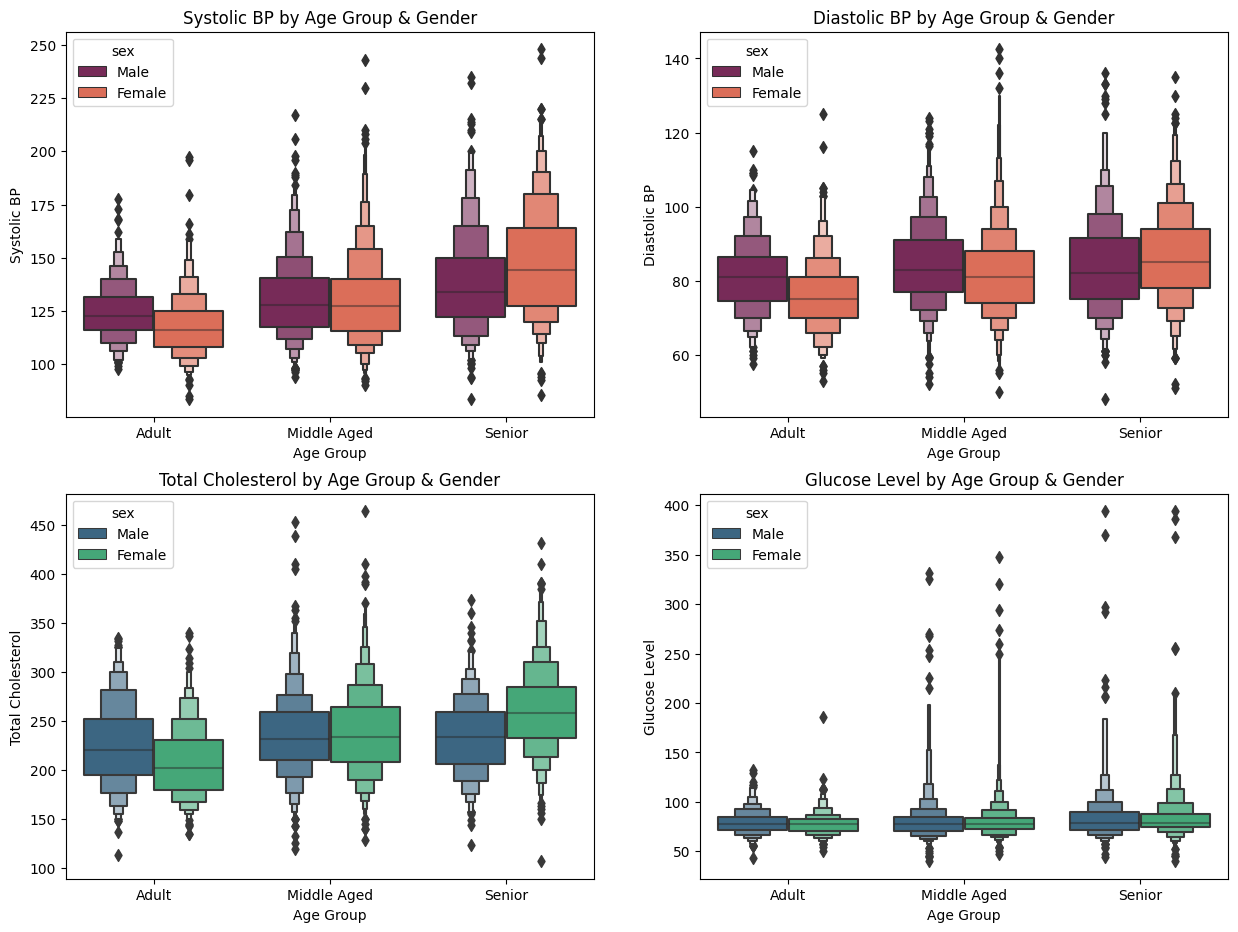

In [91]:
# Plotting boxplots for the numerical variables by category

fig , axs = plt.subplots(2, 2, figsize=(15, 11))

sns.boxenplot(data=heart, x = 'age_group', y = 'sysBP', hue = 'sex', ax = axs[0, 0], palette = 'rocket')
axs[0, 0].set_xlabel('Age Group')
axs[0, 0].set_ylabel('Systolic BP')
axs[0, 0].set_title('Systolic BP by Age Group & Gender')

sns.boxenplot(data=heart, x = 'age_group', y = 'diaBP', hue = 'sex', ax = axs[0, 1], palette = 'rocket')
axs[0, 1].set_xlabel('Age Group')
axs[0, 1].set_ylabel('Diastolic BP')
axs[0, 1].set_title('Diastolic BP by Age Group & Gender')

sns.boxenplot(data=heart, x = 'age_group', y = 'totChol', hue = 'sex', ax = axs[1, 0], palette = 'viridis')
axs[1, 0].set_xlabel('Age Group')
axs[1, 0].set_ylabel('Total Cholesterol')
axs[1, 0].set_title('Total Cholesterol by Age Group & Gender')

sns.boxenplot(data=heart, x = 'age_group', y = 'glucose', hue = 'sex', ax = axs[1, 1], palette = 'viridis')
axs[1, 1].set_xlabel('Age Group')
axs[1, 1].set_ylabel('Glucose Level')
axs[1, 1].set_title('Glucose Level by Age Group & Gender')

plt.show();

From the above boxplots, we can observe that older individuals, irrespective of gender, tend to have higher blood pressure and higher cholesterol levels. This is not unexpected and can be due to a number of factors such as sedentary lifestyle (exercise), underlying or undiagnosed conditions, and diet. However, this is outside the scope of our analysis currently.

We also notice that in the senior age category, women tend to significantly higher measurements for these variables (except glucose). This is especially in contrast to the adult category, where the reverse is apparent. It is interesting to note this trend of reversal of outcomes that happen over time.

For glucose, the overall trends do not seem obvious due to the combined effect of outliers and smaller interquartile ranges compared to the other three variables.

# Conclusion

The Framingham heart study was a pioneering study that revolutionized the field of heart health. We completed our initial data exploration, cleaning, and visualizations. The next steps would be to gain further insights into the data and then build a machine learning model to predict participant outcomes for coronary heart disease.

From our results, we can conclude that age and gender along with blood pressure and cholesterol are the core drivers of heart disease. Excluding gender, our conclusion is also supported by existing medical guidelines and literature. The original Framingham study played a crucial role in developing this consensus as well.

One of the surprising results from our analysis was the lack of effect of smoking and stroke on heart disease outcomes for the subset of participants provided to us. As noted earlier, smoking is one of the main risk factors for heart health, but we did not find any substantial divergence in our data in this regard.

This analyis is important for doctors to provide better outcomes for their patients for coronary heart disease, which according to the [CDC (2023)](https://www.cdc.gov/heartdisease/facts.htm) caused 1 in every 5 deaths in 2021. From a business perspective, reducing heart disease cases will decrease the load on hospital staff and resources. It will improve patient otucomes from the resulting improved care, which creates a positive feedback cycle. Furthermore, it is also important to improve heart disease outcomes to help insurance companies reduce the number of claims and provide better assistance to patients.

# References

1. Centers for Disease Control and Prevention. (2022, June 3). About adult BMI. Centers for Disease Control and Prevention. https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

2. American Heart Association. (2023, May 30). Understanding Blood Pressure Readings. American Heart Association. https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

3. Cleveland Clinic. (2018). Understanding Your Cholesterol Numbers | Cleveland Clinic. Cleveland Clinic. https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

4. Centers for Disease Control and Prevention. (2020, October 7). Heart disease and stroke. Centers for Disease Control and Prevention. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm

5. Centers for Disease Control and Prevention. (2023, May 15). Heart disease facts. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/facts.htm